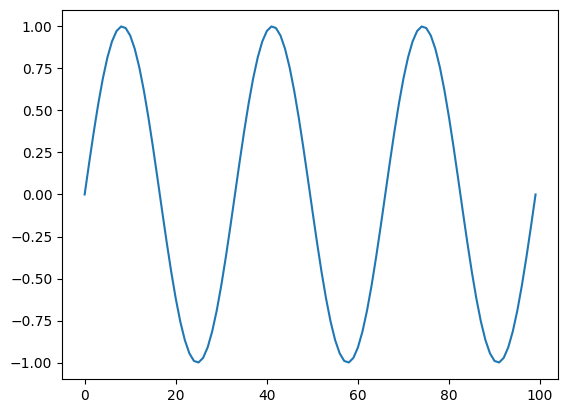

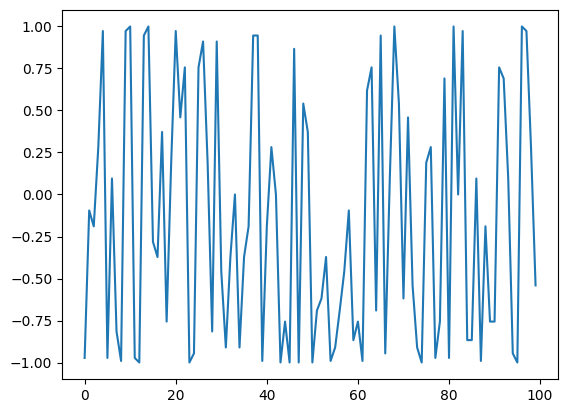

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import resample

data_arr = np.linspace(0,2*np.pi,100)
X_train = np.sin(3*data_arr)
plt.plot(X_train)
plt.show()

# Resample with replacement + add noise
X_augmented = resample(X_train, 
                     n_samples=100, 
                     replace=True)
plt.plot(X_augmented)
plt.show()

In [1]:
from collections import Counter
from sklearn.utils import resample

# Example: You have imbalanced tag data
# Class 0: No dielectric bridges (1000 samples)
# Class 1: One bridge (300 samples) 
# Class 2: Two bridges (150 samples)
# Class 3: Three bridges (50 samples)

def balance_classes_with_augmentation(X, y, target_samples_per_class=1000):
    """Balance classes by augmenting underrepresented ones"""
    
    unique_classes, class_counts = np.unique(y, return_counts=True)
    print(f"Original distribution: {dict(zip(unique_classes, class_counts))}")
    
    X_balanced = []
    y_balanced = []
    
    for cls in unique_classes:
        # Get samples for this class
        cls_mask = (y == cls)
        X_cls = X[cls_mask]
        y_cls = y[cls_mask]
        
        current_count = len(X_cls)
        
        if current_count < target_samples_per_class:
            # Need to augment this class
            n_augment = target_samples_per_class - current_count
            
            # Resample with replacement + add noise
            X_augmented = resample(X_cls, 
                                 n_samples=n_augment, 
                                 replace=True, 
                                 random_state=42)
            
            # Add small amount of noise for variation
            noise = np.random.normal(0, 0.01, X_augmented.shape)
            X_augmented = X_augmented + noise
            
            # Combine original + augmented
            X_combined = np.vstack([X_cls, X_augmented])
            y_combined = np.hstack([y_cls, np.full(n_augment, cls)])
            
        else:
            # Class has enough samples, just use original
            X_combined = X_cls
            y_combined = y_cls
            
        X_balanced.append(X_combined)
        y_balanced.append(y_combined)
    
    X_final = np.vstack(X_balanced)
    y_final = np.hstack(y_balanced)
    
    print(f"Balanced distribution: {Counter(y_final)}")
    return X_final, y_final

# Usage
X_balanced, y_balanced = balance_classes_with_augmentation(
    X_train, y_train, target_samples_per_class=1000
)

NameError: name 'X_train' is not defined